Import necessary packets

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import torch
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

Separate training set and validation set.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


The dataset involves 60,000 training images and 10,000 testing images, the resolution is 28x28.

## Visualizing Data
To get a better understanding of the dataset, let's visualize some random images for each class from training and testing datasets.

In [ ]:
def show_MNIST(labels, images, samples=8):
  numclass = 10
  classes = [str(i) for i in range(10)]
  for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in labels])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i, idx in enumerate(idxs):
      plt_idx = i * numclass + y + 1
      plt.subplot(samples, numclass, plt_idx)
      plt.imshow(images[idx], cmap='gray')
      plt.axis("off")
      if i == 0:
        plt.title(cls)

  plt.show()

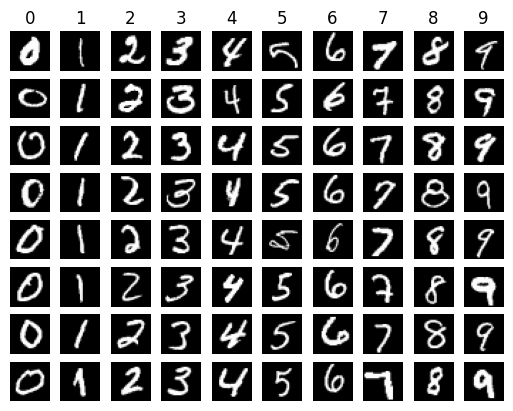

In [ ]:
show_MNIST(y_train, X_train)

Let's have a look at the average of all the images of training and testing data.

In [ ]:
def show_ave_MNIST(labels, images):
  item_type = "Digit"
  classes = [str(i) for i in range(10)]
  for y, cls in enumerate(classes):
    idxs = np.nonzero([i==y for i in labels])
    print(item_type, y, ":", len(idxs[0]), "images.")

In [ ]:
show_ave_MNIST(y_train, X_train)

Digit 0 : 5923 images.
Digit 1 : 6742 images.
Digit 2 : 5958 images.
Digit 3 : 6131 images.
Digit 4 : 5842 images.
Digit 5 : 5421 images.
Digit 6 : 5918 images.
Digit 7 : 6265 images.
Digit 8 : 5851 images.
Digit 9 : 5949 images.


In [ ]:
show_ave_MNIST(y_test, X_test)

Digit 0 : 980 images.
Digit 1 : 1135 images.
Digit 2 : 1032 images.
Digit 3 : 1010 images.
Digit 4 : 982 images.
Digit 5 : 892 images.
Digit 6 : 958 images.
Digit 7 : 1028 images.
Digit 8 : 974 images.
Digit 9 : 1009 images.


### Visualize using PCA

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
X_train = X_train.reshape(60000, 784)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [ ]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

### Visualize using t-SNE

For t-SNE, perplexity is a very important hyperparameter. It controls the effective number of neighbors that each point considers during the dimensionality reduction process.

We will run a loop to get the KL Divergence metric on various perplexities from 5 to 55 with 5 points gap. After that, we will display the result using the Plotly Express line plot.

In [ ]:
from sklearn.manifold import TSNE

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=50, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

2.5475263595581055

In [ ]:
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of MNIST dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3,perplexity=50, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

2.275390625

In [ ]:
fig = px.scatter_3d(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], z=X_train_tsne[:, 2], color=y_train)

fig.show()

# Classic Machine Learning Models

First, we need to reduce dimesion of input from 28x28 to 784.

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Convert from integer to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

## K-Nearest Neighbor


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We will now try to classify a random image from the dataset using kNN classifier

In [ ]:
print(kNN.predict(X_test[211].reshape(1, -1)))

[5]


To make sure that the output we got is correct, let's plot that image along with its label

Actual class of test image: 5


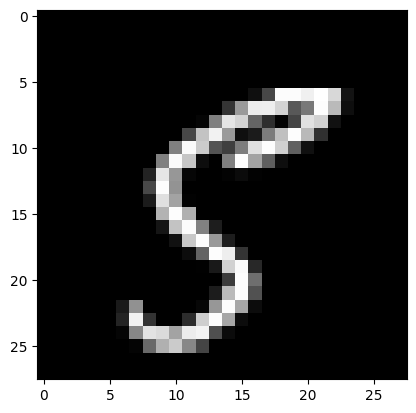

In [ ]:
%matplotlib inline
print("Actual class of test image:", y_test[211])
plt.imshow(X_test[211].reshape((28, 28)), cmap='gray')

In [ ]:
metrics.accuracy_score(y_test, kNN.predict(X_test))

NameError: name 'kNN' is not defined

With K-nearest neighbor algorithm, we have ~97% accuracy on this dataset.

## Naive-Bayes

If you are using google colab or other notebooks, please load files NaiveBayes.py and utils.py from my github repository to the session

In [ ]:
from NaiveBayes import *
from utils import *

ModuleNotFoundError: No module named 'NaiveBayes'

In [ ]:
print(X_train.shape)
temp_train_lbl = y_train.reshape(60000,1)
training_examples = np.hstack((X_train, temp_train_lbl))
print(training_examples.shape)

In [ ]:
MNIST_dataset = Dataset(examples=training_examples, distance=manhattan_distance)

In [ ]:
nb = NaiveBayesLearner(MNIST_dataset)

Let's make a prediction.

In [ ]:
print(nb(X_test[15]))

To make sure we got correct output, let's plot the image along with it's label.

In [ ]:
%matplotlib inline
print("Actual class of test image:", y_test[15])
plt.imshow(X_test[15].reshape((28, 28)), cmap='gray')

In [ ]:
metrics.accuracy_score(y_test, [nb(test_img) for test_img in X_test])

Because Naive Bayes is a generative model and it relies on the strong assumption that attributes are not dependent on each other. It seems that in this task, the assumption violated practice. Therefore, the result is bad.

## SVM (Support Vector Machines)

In [4]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold

In [5]:
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]

We will try with three different kernels: Gaussian RBF, Linear, and Quadratic.

In [ ]:
p_grid = {"C": [1, 10], "gamma": [0.1, 0.01], "kernel": ["rbf", "linear"]} # list of hyperparameters choose optimized
svc = svm.SVC()
val_score = []

for i in p_grid["C"]:
  for j in p_grid["gamma"]:
    for k in p_grid["kernel"]:
      svc = svm.SVC(C=i, gamma=j, kernel=k)
      svc.fit(X_train, y_train)
      print("C:", i, "gamma:", j, "kernel:", k, "test accuracy:", svc.score(X_val, y_val))

C: 1 gamma: 0.1 kernel: rbf test accuracy: 0.9481
C: 1 gamma: 0.1 kernel: linear test accuracy: 0.9366
C: 1 gamma: 0.01 kernel: rbf test accuracy: 0.9764
C: 1 gamma: 0.01 kernel: linear test accuracy: 0.9366
C: 10 gamma: 0.1 kernel: rbf test accuracy: 0.9504
C: 10 gamma: 0.1 kernel: linear test accuracy: 0.9296
C: 10 gamma: 0.01 kernel: rbf test accuracy: 0.9836
C: 10 gamma: 0.01 kernel: linear test accuracy: 0.9296


The SVM with hyperparameters C=10, gamma=0.01 and kernel=rbf got the highest score in validation test. Then we choose it and test it performance.

In [6]:
svc = svm.SVC(C=10, gamma=0.01, kernel="rbf")
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.9825
Precision: 0.9825
Recall: 0.9825


The SVM model got an accurace score of 0.9825 which is 98.25%. This is a good result.

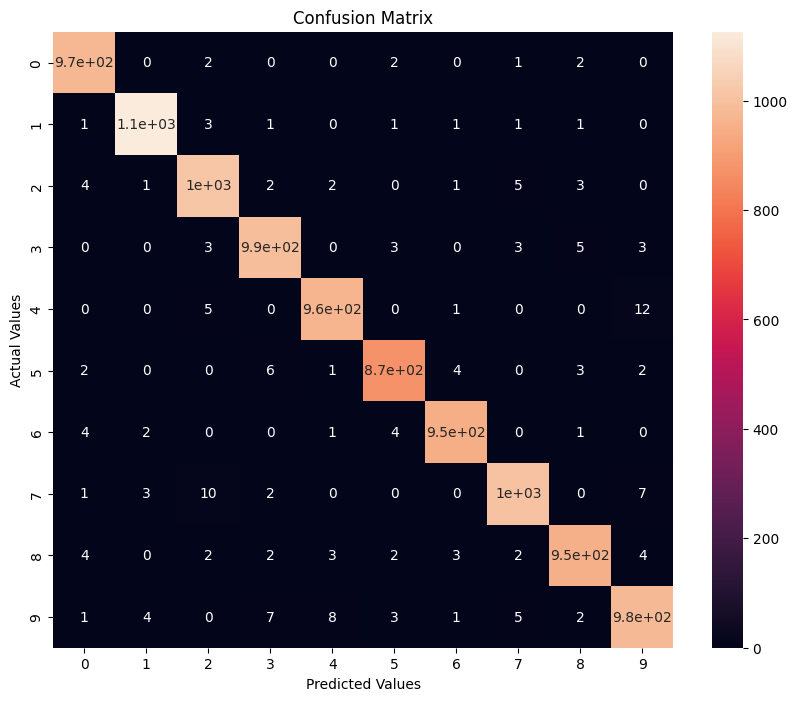

In [7]:
cm = metrics.confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [i for i in range(10)],
                     columns = [i for i in range(10)])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

The digit 9 is the most confused number which has 31 wrong predictions. On average, each number has 17.5 wrong predictions.

In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Boosting Learning
In this section, I use **Gradient Boosting** for the classification problem.

Boosting is the most popular ensemble method. Boosting works by focusing on the misclassified examples by putting weights to examples that describes how much the example should count during training. After training a hypothesis, Boosting algorithms increase weights of misclassified examples while decrease the weights of the correctly classified examples.

The final result is voted by individual hypothesis like bagging, except that each hypothesis receives a weight with respect to their performance on their weighted training sets.

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
val_error = []
train_error = []
ens_model = GradientBoostingClassifier()
ens_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [10]:
y_pred = ens_model.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.9458
Precision: 0.9458
Recall: 0.9458


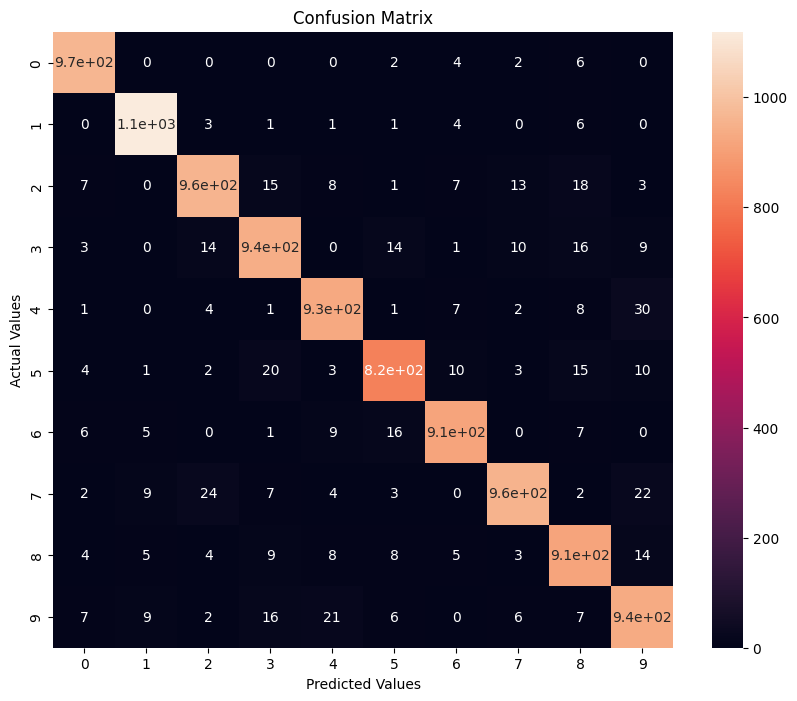

In [7]:
cm = metrics.confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = [i for i in range(10)],
                     columns = [i for i in range(10)])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Deep Learning

## Neural Networks
Let's build a convolutional neural network

There are 10 categorical classes, therefore, we can use one hot encoding to transform the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes.

In [ ]:
# baseline cnn model for mnist
import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()
  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

### Prepare Pixel Data
The values of pixel for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255. Now, we normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves converting the data type to floats, then dividing the pixel values by 255.

In [ ]:
def prep_pixels(train, test):
  # Convert from integer to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # Normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # Return normalized images
  return train_norm, test_norm

### Define Model

In this stage, we define a baseline convolutional neural network model for the problem.

The model comprises two primary components: the feature extraction frontend and the classifier backend. The feature extraction frontend includes convolutional and pooling layers, while the classifier backend is responsible for making predictions.

The convolutional layer has a small filter size of (3,3) and 32 filters, followed by a max pooling layer. Next, two convolutional has filter size of (3,3) and 64 filter, followed by a max pooling layer. The resulting filter maps are then flattened to create feature inputs for the classifier.

Softmax activation function is used for output becausethe problem is a multi-class classification task with 10 classes. Between the feature extractor and the output layer, we add a dense layer to interpret the features, in this case with 100 nodes.

All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.

In [ ]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = define_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

### Training and Evaluation
Let's train and evaluate the model with the test set. Then, choose proper hyperparamater.

In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
  scores, records = [], []
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    record = model.fit(trainX, trainY, epochs=25, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    records.append(record)
  return scores, records

In [ ]:
def summarize_diagnostics(records):
  for i in range(len(records)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(records[i].history['loss'], color='blue', label='train')
    plt.plot(records[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(records[i].history['accuracy'], color='blue', label='train')
    plt.plot(records[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  # box and whisker plots of results
  plt.boxplot(scores)
  plt.show()

> 99.117
> 99.150
> 99.017
> 99.400
> 99.100


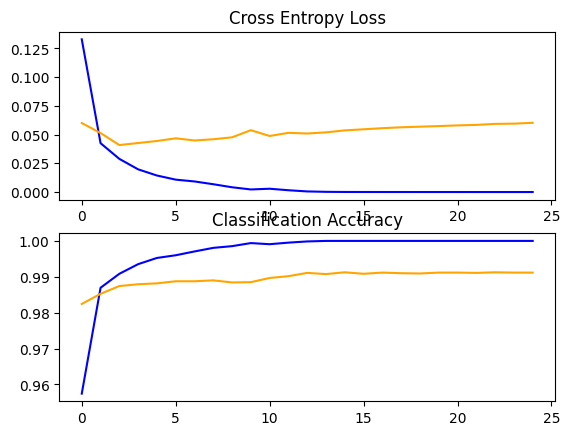

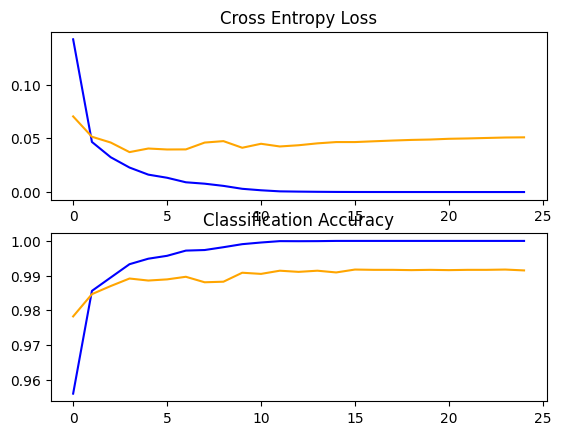

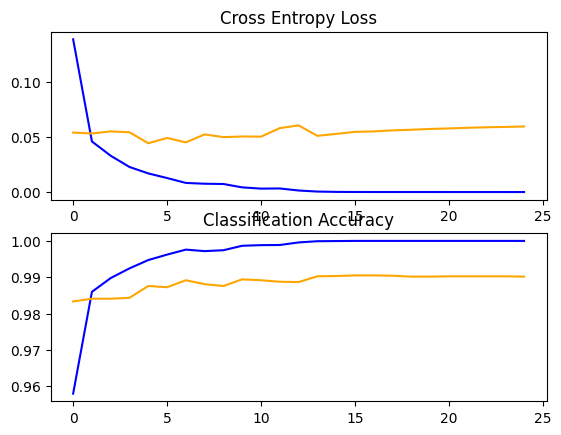

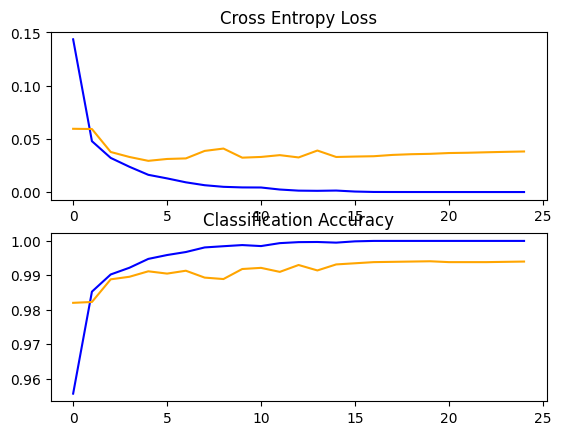

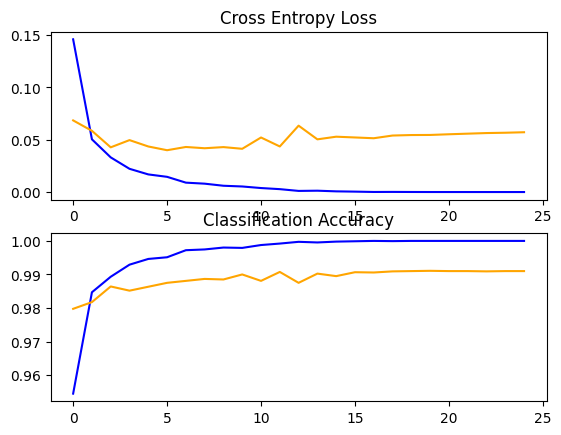

Accuracy: mean=99.157 std=0.129, n=5


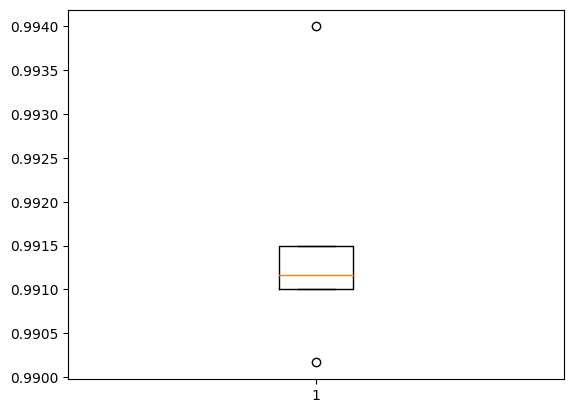

In [ ]:
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # evaluate model
  scores, records = evaluate_model(trainX, trainY)
  # learning curves
  summarize_diagnostics(records)
  # Summarize estimated performance
  summarize_performance(scores)

run_test_harness()

After all, let's predict one testing image

In [ ]:
trainX, trainy, testX, testy = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
model = define_model()
model.fit(trainX, trainy, epochs=25, batch_size=32, verbose=0)
model.save('final_model.h5')
# Evaluate model on test dataset
_, acc = model.evaluate(testX, testy, verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


> 99.390


We got an accuracy of 99.29% which is a good result. It is estimated that humans have an error rate of about 0.2% on this problem.

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step


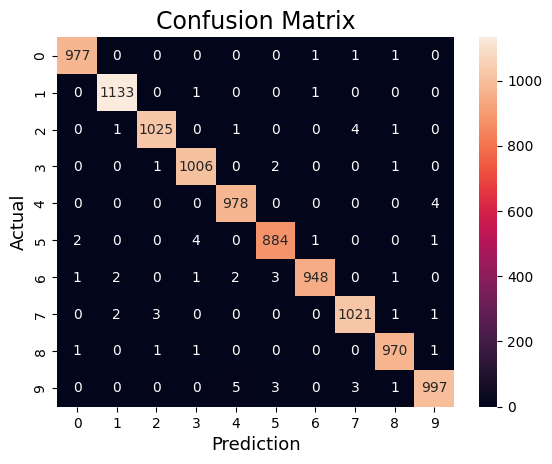

In [ ]:
cm = confusion_matrix(y_test,[np.argmax(model.predict(testx.reshape(1,28,28,1))) for testx in testX])
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

As the confusion matrix shows, the 9 digit is the most wrong digit.

In [ ]:
print(classification_report(y_test,[np.argmax(model.predict(testx.reshape(1,28,28,1))) for testx in testX]))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

